In [1]:
# Scientific
import random
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import expon

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ML
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Parallelization
from joblib import Parallel, delayed
from tqdm import tqdm

# Typing
from nptyping import NDArray, Float64, Shape

# Setting Notebook Options
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
seed = np.random.randint(0, 1e9)


In [2]:
from data_simulation.simulate_data import Experiment
exp1 = Experiment(cluster_number_range=(8,8))
df = exp1.df
X = exp1.X
X.shape

(370, 2)

In [3]:
exp1.cluster_number_range

(8, 8)

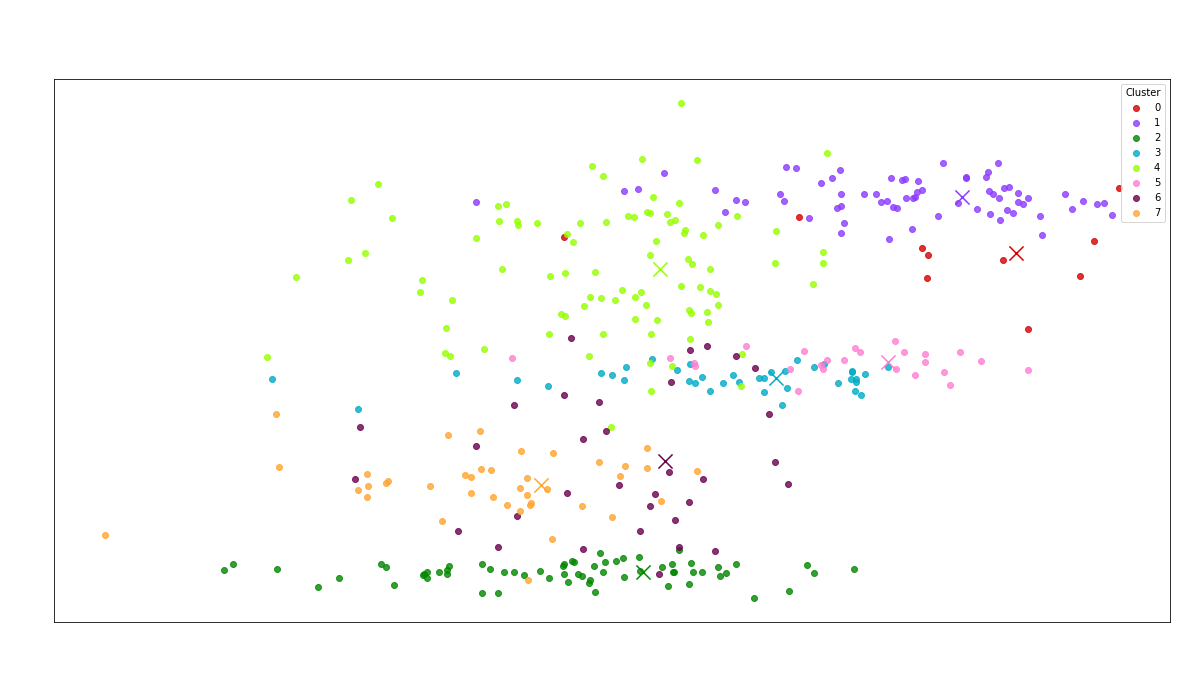

In [4]:
from plotting.plot_funcs import plot_cluster

plot_cluster(exp1.df, "cluster", title="True Clusters")

### Cluster initialization

In [5]:
from cluster_initialization.init_class import Cluster_initialization, Routine

cluster_init = Cluster_initialization(exp1.df, routine = Routine.random_inside)
params_array = cluster_init.init_params_array

In [6]:
from plotting.plot_funcs import plot_responsibilities
from IPython.display import display

if cluster_init.variant in ["OPTICS", "OPTICS_weighted"]:
    fig = plot_responsibilities(exp1, params_array)
    display(fig)
    fig = plot_cluster(cluster_init.df, "init_cluster", title="Cluster initizialization")
    display(fig)

Single Run

In [7]:
from model_selection.run import model_selection_run

em_params = {
    "max_iter": 1000,
    "em_tol": 1e-5,
    "min_mix_coef": 0.01
}

init_params = {
    "N_cluster_max": 8,
    "N_runs_per_clusternumber": 30
}
parallel_params = {
    "n_jobs": 10
}

df_scores2, results2 = model_selection_run(X, cluster_init, em_params, init_params, parallel_params)

KeyboardInterrupt: 

In [ ]:
from model_selection.run import model_selection_run2

df_scores, results = model_selection_run2(X, cluster_init, em_params, init_params, parallel_params)

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
results2["ll"]

[-668.6844035447676,
 -668.6844035337671,
 -668.6844035330073,
 -668.6844035334135,
 -668.6844035328758,
 -668.684403534409,
 -668.6844035325455,
 -668.684403567571,
 -668.6844035718573,
 -668.6844035392821,
 -668.6844035389114,
 -668.6844036378824,
 -668.6844035442019,
 -668.6844035345661,
 -668.6844035459608,
 -668.6844035420169,
 -668.6844035410841,
 -668.6844035342641,
 -668.6844036294979,
 -668.6844035331476,
 -668.6844035653579,
 -668.6844035514929,
 -668.6844035338083,
 -668.6844035706623,
 -668.6844035330722,
 -668.6844035338975,
 -668.6844035327204,
 -668.684403690122,
 -668.6844035953555,
 -668.684403828621,
 -641.7095762820762,
 -508.188050459981,
 -641.7203633349062,
 -508.13052285034206,
 -508.1676425747853,
 -508.35431727488157,
 -508.2105240619276,
 -508.3209503683566,
 -508.21548899296545,
 -508.33138438450413,
 -641.7078825144697,
 -508.2995044799687,
 -508.14704803300026,
 -508.4889560606759,
 -538.7152278858691,
 -508.2623039727137,
 -508.33333078491796,
 -513.962323

In [ ]:
df_scores.head(50)

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank
0,89,16,0.447243,-412.767791,424.767791,448.067726,439.075013,0.237777,345.687451,3,1,1,1,1,7,7,18,1,0.946898,1
1,88,18,0.368948,-413.019416,425.019416,448.319351,439.332135,0.238506,341.770137,3,3,3,3,3,5,9,26,3,0.946787,2
2,87,19,0.572851,-413.002968,425.002968,448.302902,439.314729,0.238027,343.762405,3,2,2,2,2,6,8,22,2,0.946671,3
3,74,8,0.137408,-416.626517,428.626517,451.926452,442.944467,0.236583,334.043821,3,4,4,4,4,9,10,35,4,0.941679,4
4,84,7,0.094633,-417.455106,429.455106,452.755040,443.764986,0.236958,330.510575,3,5,5,5,5,8,11,39,5,0.940742,5
5,85,7,0.125547,-431.085071,443.085071,466.385005,457.367074,0.232676,346.939906,3,6,6,6,6,13,6,43,6,0.922307,6
6,81,16,0.256211,-454.012678,466.012678,489.312612,480.292450,0.232739,347.011202,3,7,7,7,7,12,5,45,7,0.893358,7
7,86,24,0.532532,-479.565928,491.565928,514.865862,505.821541,0.216403,292.892349,3,10,9,9,9,18,16,71,8,0.856418,8
8,113,16,0.387595,-458.357966,474.357966,505.424545,489.780254,0.114000,171.352283,4,8,8,8,8,63,73,168,16,0.847552,9
9,65,11,0.172615,-487.909332,499.909332,523.209266,514.104479,0.219635,289.778746,3,15,13,10,12,15,17,82,9,0.846818,10


In [ ]:
df_scores2.head(80)

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank
0,87,27,0.643553,-412.468279,424.468279,447.768213,438.770644,0.236899,347.332862,3,1,1,1,1,7,3,14,1,0.954185,1
1,60,19,0.475006,-412.924526,424.924526,448.224461,439.237975,0.237777,345.687451,3,2,2,2,2,5,4,17,2,0.953804,2
2,64,12,0.361583,-414.221867,426.221867,449.521801,440.528838,0.238248,339.517947,3,3,3,3,3,4,6,22,3,0.952237,3
3,85,17,0.420445,-414.604213,426.604213,449.904147,440.928515,0.238520,339.776426,3,4,4,4,4,3,5,24,4,0.951801,4
4,65,12,0.272912,-417.735725,429.735725,453.035659,444.055185,0.236854,330.559248,3,6,5,5,5,8,8,37,6,0.947327,5
5,89,7,0.183551,-419.815847,431.815847,455.115781,446.138854,0.237122,347.680155,3,7,6,6,6,6,2,33,5,0.944689,6
6,112,12,0.516625,-417.105821,433.105821,464.172400,448.175384,0.134715,234.274178,4,5,7,7,7,51,35,112,11,0.916624,7
7,77,14,0.361168,-445.399820,457.399820,480.699754,471.654797,0.227665,315.845784,3,11,9,9,9,12,10,60,7,0.909161,8
8,98,12,0.230387,-426.010778,442.010778,473.077357,457.097909,0.104574,234.788139,4,8,8,8,8,68,33,133,13,0.897664,9
9,75,12,0.207800,-459.718351,471.718351,495.018285,485.997935,0.233841,334.962376,3,13,12,10,12,9,7,63,8,0.892067,10


In [ ]:
results2["params"][param_index][::4]

array([0.34665218, 0.15629196, 0.06155584, 0.0688104 , 0.36668962])

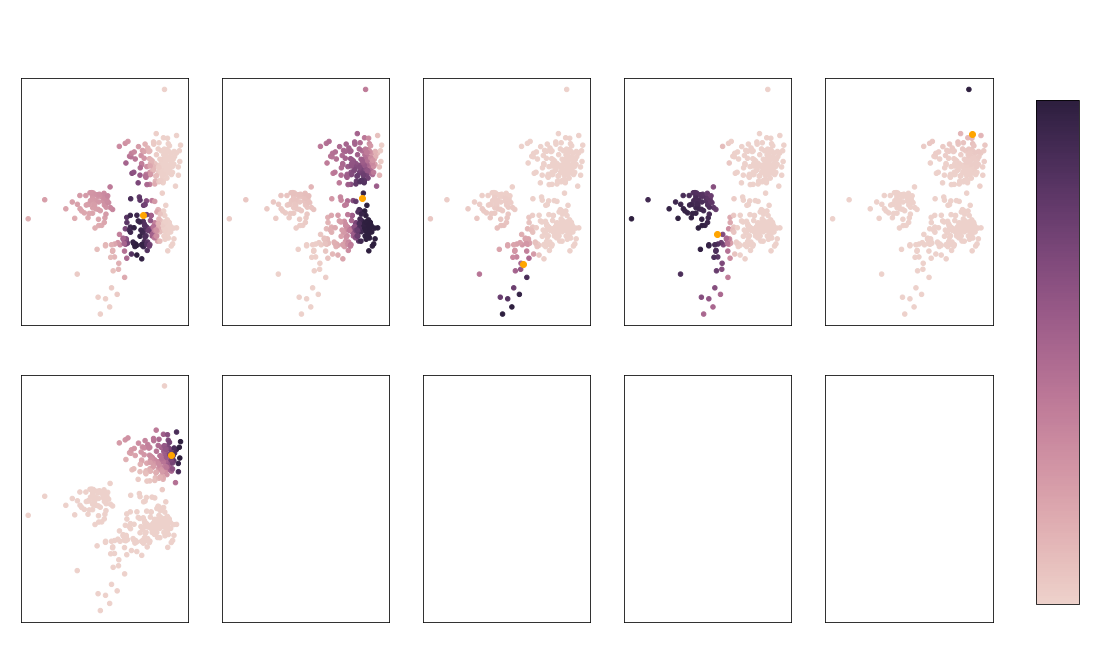

In [ ]:
param_index = 153

plot_responsibilities(exp1, results["params"][param_index])  # best AIC score

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
param_idx = 22
#criterion = "TOTAL_rank"

plot_clustering_assessment(run_data, run_results, init_routine, dataset, criterion, param_idx=param_idx)

NameError: name 'run_data' is not defined

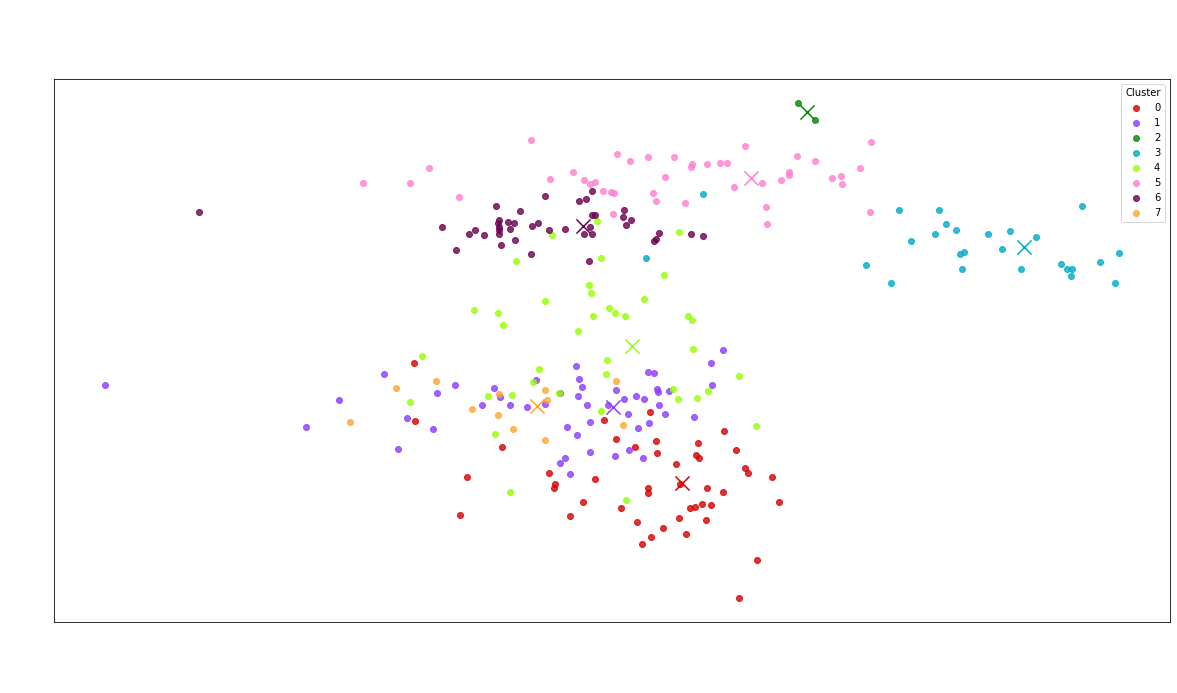

In [ ]:
plot_cluster(exp1.df, "cluster", title="True Clusters")

In [ ]:
from post_processing.identfy_clusters import get_prediction_df

df_pred = get_prediction_df(exp1.df.copy(), results, df_scores)

In [ ]:
df_pred.loc[0:0, :]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,gamma_2,identified_as_cluster
0,0,0.037728,1.054194,1.041736,0,0.042918,0.870235,0.974798,0.224608,0.005597,-0.189948,0.99718,0.002808,0.000012,0


In [ ]:
df_pred[df_pred.index==0]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,gamma_2,identified_as_cluster
0,0,0.037728,1.054194,1.041736,0,0.042918,0.870235,0.974798,0.224608,0.005597,-0.189948,0.99718,0.002808,0.000012,0
